# CLP program

In [ ]:
print(f'povezave: {graphs.CycleGraph(5).edges()}')
print(f'vozlisca: {graphs.CycleGraph(5).vertices()}')

povezave: [(0, 1, None), (0, 4, None), (1, 2, None), (2, 3, None), (3, 4, None)]
vozlisca: [0, 1, 2, 3, 4]


In [93]:
from sage.numerical.mip import MixedIntegerLinearProgram

def razdalja(moznost, vozlisce, G):
    c, a = moznost
    if c == 'e':
        U, V = a
        return min(G.distance(U, vozlisce), G.distance(V, vozlisce))
    else:
        return G.distance(a, vozlisce)

In [86]:
# najprej bi rada definirala razdaljo - različne možnosti, glede na to kaj dobiš
# vse skupaj 4 moznosti povezava-povezava, povezava-vozlišče, vozlišče-povezava, vozlišče-vozlišče
def razdalja_prejsnja(moznost1, moznost2, G):
    c, a = moznost1
    d, b = moznost2
    # če imamo dve povezavi
    if c == 'e' and d == 'e':
        U, V = a
        W, X = b
        return min(G.distance(U, W), G.distance(U, X), G.distance(V, W), G.distance(V, X))
    # prva povezava, druga ne
    elif c == 'e':
        U, V = a
        return min(G.distance(U, b), G.distance(V, b))
    # druga povezava, prva ne
    elif d == 'e':
        W, X = b
        return min(G.distance(W, a), G.distance(X, a))
    # ce mamo dve vozlisci
    else:
        return G.distance(a, b)

In [94]:
G = graphs.CycleGraph(6)
razdalja(('e', (0, 1)), 5, G)

1

In [95]:
def CLP_weak_k_dim(G, k):
    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)

    V = G.vertices()
    E = G.edges(labels=False)

    moznosti = [('v', v) for v in V] + [('e', e) for e in E]

    p.set_objective(sum(x[v] for v in V))
    
    for a, b in Combinations(moznosti, 2):
        p.add_constraint(
            sum(abs(razdalja(a, v, G) - razdalja(b, v, G)) * x[v] for v in V) >= k
            )

    wmdim_k = p.solve()
    mnozica_S = [v for v in V if p.get_values(x[v]) > 0.5]

    return (wmdim_k, mnozica_S)

In [98]:
G = graphs.CycleGraph(7)
# ta graf bi imel takole: V = [0,1,2,3,4,5,6] in E = [((0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,0)]
k = 3

print(f'{CLP_weak_k_dim(G,k)}') # - vrne S = [6, (0, 1), (1, 2), (3, 4), (4, 5)], torej zadnje vozlišče in te 4 povezave.

(7.0, [0, 1, 2, 3, 4, 5, 6])


In [99]:
def kappa_2_crti(G):
    k = 1
    while True:
        try:
            CLP_weak_k_dim(G, k)
            k += 1
        except:
            return k - 1

In [100]:
kappa_2_crti(G)

3

# Cikli

In [101]:
def cikli_do_n(n):
    for i in range(3, n + 1):
        G = graphs.CycleGraph(i) 
        kappa_2crti = kappa_2_crti(G)
        print(f"- velikost: {i} : kappa = {kappa_2crti}")
        for k in range(1, kappa_2crti + 1):
            wmdim, _ = CLP_weak_k_dim(G, k)
            print(f"  k = {k}, wmdim = {wmdim}")

In [102]:
cikli_do_n(20)

- velikost: 3 : kappa = 1
  k = 1, wmdim = 3.0
- velikost: 4 : kappa = 2
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
- velikost: 5 : kappa = 2
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
- velikost: 6 : kappa = 3
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
- velikost: 7 : kappa = 3
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
- velikost: 8 : kappa = 4
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
  k = 4, wmdim = 8.0
- velikost: 9 : kappa = 4
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 9.0
- velikost: 10 : kappa = 5
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 10.0
- velikost: 11 : kappa = 5
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 9.0
  k = 5, wmdim = 11.0
- velikost: 12 : kappa = 6
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 10.0
  k = 6, wmdim = 12.

# Hiperkocke

In [103]:
def hiperkocke_do_n(n):
    for i in range(1, n + 1):
        G = graphs.CubeGraph(i)
        kappa_2crti = kappa_2_crti(G)
        print(f"- velikost: {i} : kappa = {kappa_2crti}")
        for k in range(kappa_2crti + 1):
            wmdim, _ = CLP_weak_k_dim(G, k)
            print(f"  k = {k}, wmdim = {wmdim}")

In [104]:
k = 3
H = graphs.CubeGraph(4)
CLP_weak_k_dim(H, k)

(7.0, ['0001', '0010', '0110', '1000', '1011', '1100', '1111'])

In [106]:
hiperkocke_do_n(5)

- velikost: 1 : kappa = 1
  k = 0, wmdim = 0.0
  k = 1, wmdim = 2.0
- velikost: 2 : kappa = 2
  k = 0, wmdim = 0.0
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
- velikost: 3 : kappa = 4
  k = 0, wmdim = 0.0
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 8.0
- velikost: 4 : kappa = 8
  k = 0, wmdim = 0.0
  k = 1, wmdim = 4.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 11.0
  k = 6, wmdim = 14.0
  k = 7, wmdim = 15.0
  k = 8, wmdim = 16.0
- velikost: 5 : kappa = 16
  k = 0, wmdim = 0.0
  k = 1, wmdim = 4.0
  k = 2, wmdim = 6.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 11.0
  k = 6, wmdim = 12.0
  k = 7, wmdim = 15.0
  k = 8, wmdim = 16.0
  k = 9, wmdim = 19.0
  k = 10, wmdim = 20.0
  k = 11, wmdim = 23.0
  k = 12, wmdim = 24.0
  k = 13, wmdim = 28.0
  k = 14, wmdim = 30.0
  k = 15, wmdim = 31.0
  k = 16, wmdim = 32.0


# Kartezični produkt ciklov

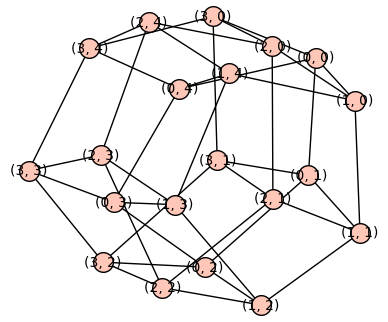

8

In [108]:
l, m = 4,5

A = graphs.CycleGraph(l)
B = graphs.CycleGraph(m)
G = A.cartesian_product(B)

G.show()
kappa_2_crti(G)

In [29]:
def kartezicni_produkt_do_n(n):
    for l in range(3, n + 1):
        A = graphs.CycleGraph(l)
        for m in range(3, n + 1):
            B = graphs.CycleGraph(m)
            G = A.cartesian_product(B)
            print(f'{G.vertices()}')
            kappa_2crti = kappa_2_crti(G)
            print(f"- velikost: {l, m} : kappa = {kappa_2crti}")
            for k in range(kappa_2crti + 1):
                wmdim, _ = CLP_weak_k_dim(G, k)
                print(f"  k = {k}, wmdim = {wmdim}")

In [30]:
kartezicni_produkt_do_n(4)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
- velikost: (3, 3) : kappa = 0


ValueError: vertex '0' is not in the (di)graph

In [56]:
gen = graphs.nauty_geng('4 -c')

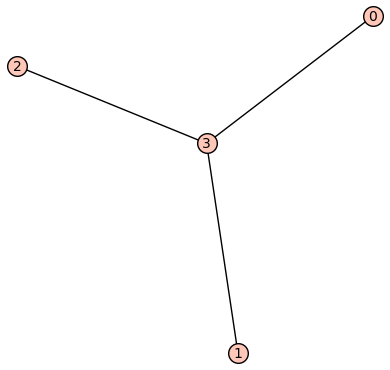

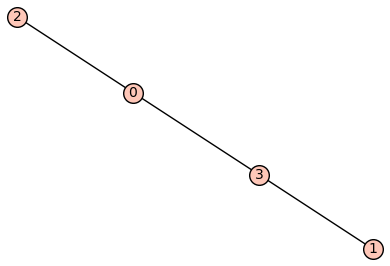

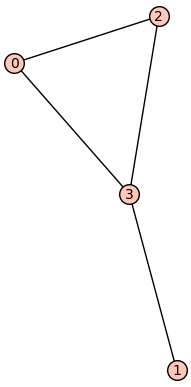

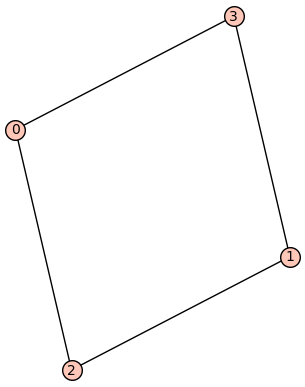

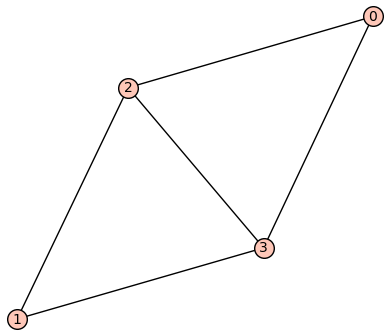

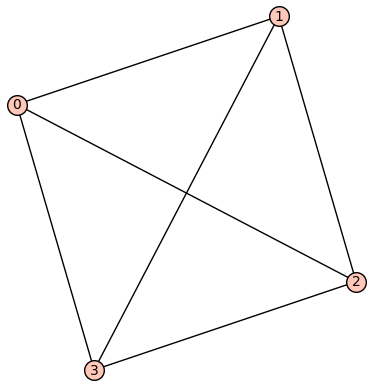

In [57]:
for g in gen:
    g.show()